In [1]:
import numpy as np 
import matplotlib.pylab as plt
from getdist import plots, MCSamples
import getdist
import pandas as pd
import os
import glob
import sys
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib import cm

# our script
import utils.helpers as hp
import utils.statistics as us

fontSize = 20

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})

settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3}
np.set_printoptions(precision=3)

In [2]:
PATH = 'chains/chains-nz-15000/' #'/home/harry/Desktop/MontePython-V3.4/chains/'

In [3]:
mean_colors = cm.tab10.colors[0:5]
random_colors = cm.tab10.colors[0:5]

In [4]:
def load_data(folder: str) -> np.ndarray:
    """
    omega_cdm
    ln10^{10}A_s
    omega_b
    n_s
    h
    A_IA
    c_min
    dc
    Ac
    Omega_m
    sigma8
    """
    
    # the full path to the file 
    loc = PATH + folder + '/'
    all_files = os.listdir(PATH + folder)
    
    # we grab all the files which contain the samples 
    files = np.array(all_files)[['__' in f for f in all_files]]
    
    # empty list to record the samples 
    samples = []
    
    for file in files:
        
        samples.append(np.loadtxt(loc + file))
        
    samples = np.concatenate(samples)
    nsamples = samples.shape[0]
    
    # compute S_8 
    S8 = samples[:,-1] * np.sqrt(samples[:,-2] / 0.3)
    S8 = S8.reshape(nsamples, 1) 
    Om = samples[:,-2].reshape(nsamples, 1)
    
    S8_Om = np.concatenate([Om, S8], axis = 1)
    
    return samples, S8_Om

### KV-450 Samples

In [5]:
# number of dimensions for plotting
ndim = 2

# some names for the parameters
names = ["x%s"%i for i in range(ndim)]
labels = [r'$\Omega_{\textrm{m}}$', r'$S_{8}$']

alpha = 0.7

In [6]:
Nset = 5
# we are using sets [2, 3, 4, 5] hence, i+2
# mean = {'M'+ str(i+2): load_data('KV-450-Bayes-Mean-Set-'+str(i+2)) for i in range(Nset)}
random = {'R'+ str(i+2): load_data('KV-450-Bayes-Random-Set-'+str(i+2)) for i in range(Nset)}

In [7]:
us.summary(random['R2'][1], labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.308 ± (0.098, 0.093)
$S_{8}$                                  :  0.770 ± (0.038, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.311 ± (0.096, 0.096)
$S_{8}$                                  :  0.769 ± (0.038, 0.039)


In [8]:
us.summary(random['R3'][1], labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.299 ± (0.101, 0.101)
$S_{8}$                                  :  0.746 ± (0.038, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.300 ± (0.099, 0.102)
$S_{8}$                                  :  0.745 ± (0.038, 0.038)


In [9]:
us.summary(random['R4'][1], labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.301 ± (0.103, 0.097)
$S_{8}$                                  :  0.765 ± (0.039, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.306 ± (0.098, 0.101)
$S_{8}$                                  :  0.765 ± (0.039, 0.038)


In [10]:
us.summary(random['R5'][1], labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.308 ± (0.094, 0.101)
$S_{8}$                                  :  0.743 ± (0.036, 0.038)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.307 ± (0.094, 0.100)
$S_{8}$                                  :  0.743 ± (0.037, 0.038)


# The Combined Set

In [17]:
us.summary(np.concatenate([random['R'+str(i+2)][1] for i in range(4)]), labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.304 ± (0.099, 0.098)
$S_{8}$                                  :  0.757 ± (0.040, 0.040)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.306 ± (0.097, 0.100)
$S_{8}$                                  :  0.756 ± (0.040, 0.040)


In [11]:
us.summary(random['R6'][1], labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.316 ± (0.097, 0.106)
$S_{8}$                                  :  0.758 ± (0.037, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.314 ± (0.099, 0.104)
$S_{8}$                                  :  0.757 ± (0.038, 0.038)


In [12]:
random_triangle = []

for i in range(Nset):
    lab = f'Set {i+2}'
    if i == 4:
        lab = f'Combined Set'
    random_plot = MCSamples(samples=random['R'+str(i+2)][1],names = names, labels = labels, settings = settings, label = lab)
    random_plot.updateSettings({'contours': [0.68, 0.95]})
    random_triangle.append(random_plot)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


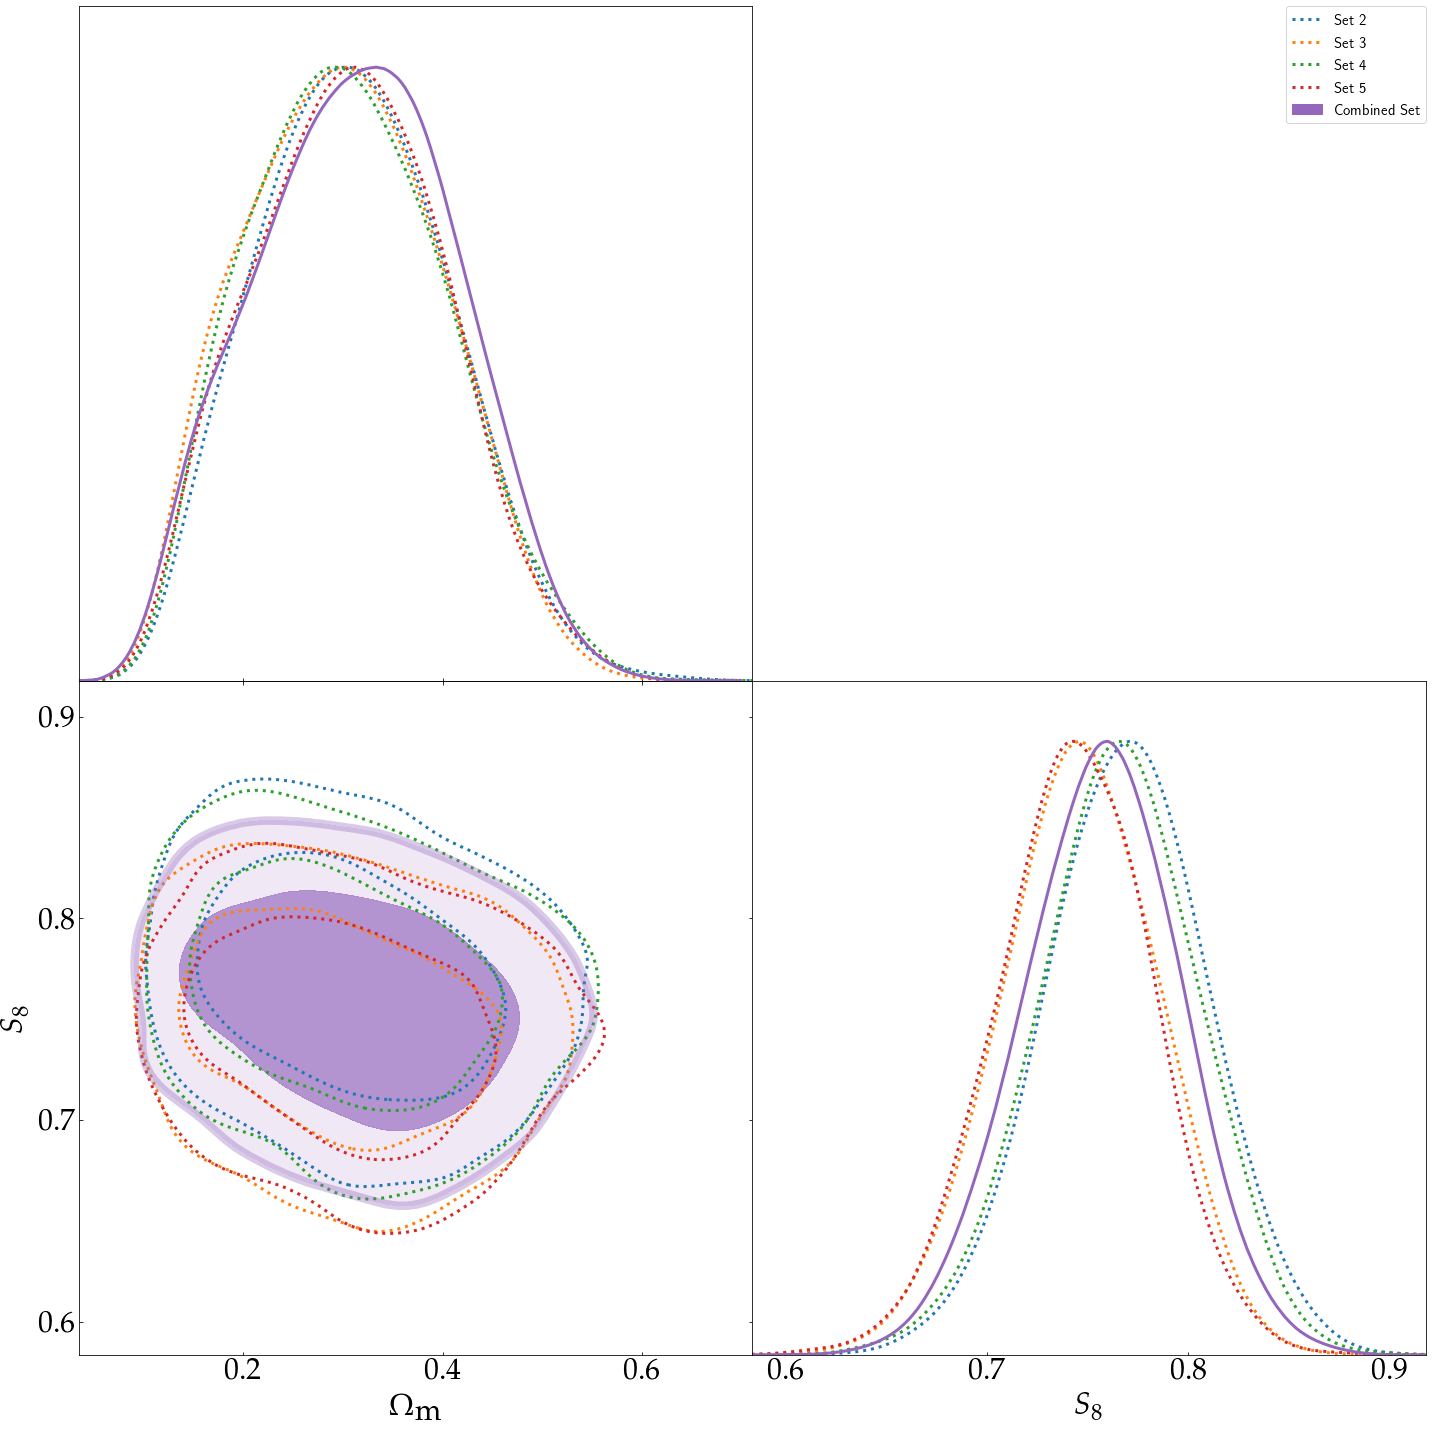

In [13]:
contours = np.array([0.68,0.95])

G = plots.getSubplotPlotter(subplot_size=10)
G.settings.solid_contour_palefactor = 0.8
G.settings.alpha_filled_add = alpha
G.settings.num_plot_contours = 2
G.settings.lw_contour = 3
G.settings.axes_fontsize = 30
G.settings.lab_fontsize = 30
G.settings.fontsize = 35 # important for padding in x-axis 
G.settings.legend_fontsize = 15
G.triangle_plot(random_triangle, filled = [False]*4+[True], contour_colors=random_colors, contour_lws=[3]*Nset, contour_ls=[':']*4+['-'])
# plt.savefig('/home/harry/Desktop/independent.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()

# Subsets

In [14]:
def extract_parameters(file: pd.DataFrame):
    
    samples = file[['p'+str(i+1) for i in range(11)]].values
    nsamples = samples.shape[0]
    
    # compute S_8 
    S8 = samples[:,-1] * np.sqrt(samples[:,-2] / 0.3)
    S8 = S8.reshape(nsamples, 1) 
    Om = samples[:,-2].reshape(nsamples, 1)
    
    S8_Om = np.concatenate([Om, S8], axis = 1)
    
    return samples, S8_Om

In [15]:
long_chain = pd.read_csv('subsets/all_samples.csv').iloc[:,2:]
set_2 = pd.read_csv('subsets/set_2.csv').iloc[:,2:]
set_3 = pd.read_csv('subsets/set_3.csv').iloc[:,2:]
set_4 = pd.read_csv('subsets/set_4.csv').iloc[:,2:]
set_5 = pd.read_csv('subsets/set_5.csv').iloc[:,2:]

In [16]:
samples_combined, two_params_combined = extract_parameters(long_chain)
samples_2, two_params_2 = extract_parameters(set_2)
samples_3, two_params_3 = extract_parameters(set_3)
samples_4, two_params_4 = extract_parameters(set_4)
samples_5, two_params_5 = extract_parameters(set_5)

In [17]:
samples_plot = [two_params_2, two_params_3, two_params_4, two_params_5, two_params_combined]

In [18]:
random_triangle = []

for i in range(Nset):
    lab = f'Set {i+2}'
    if i == 4:
        lab = f'Combined Set'
    random_plot = MCSamples(samples=samples_plot[i],names = names, labels = labels, settings = settings, label = lab)
    random_plot.updateSettings({'contours': [0.68, 0.95]})
    random_triangle.append(random_plot)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


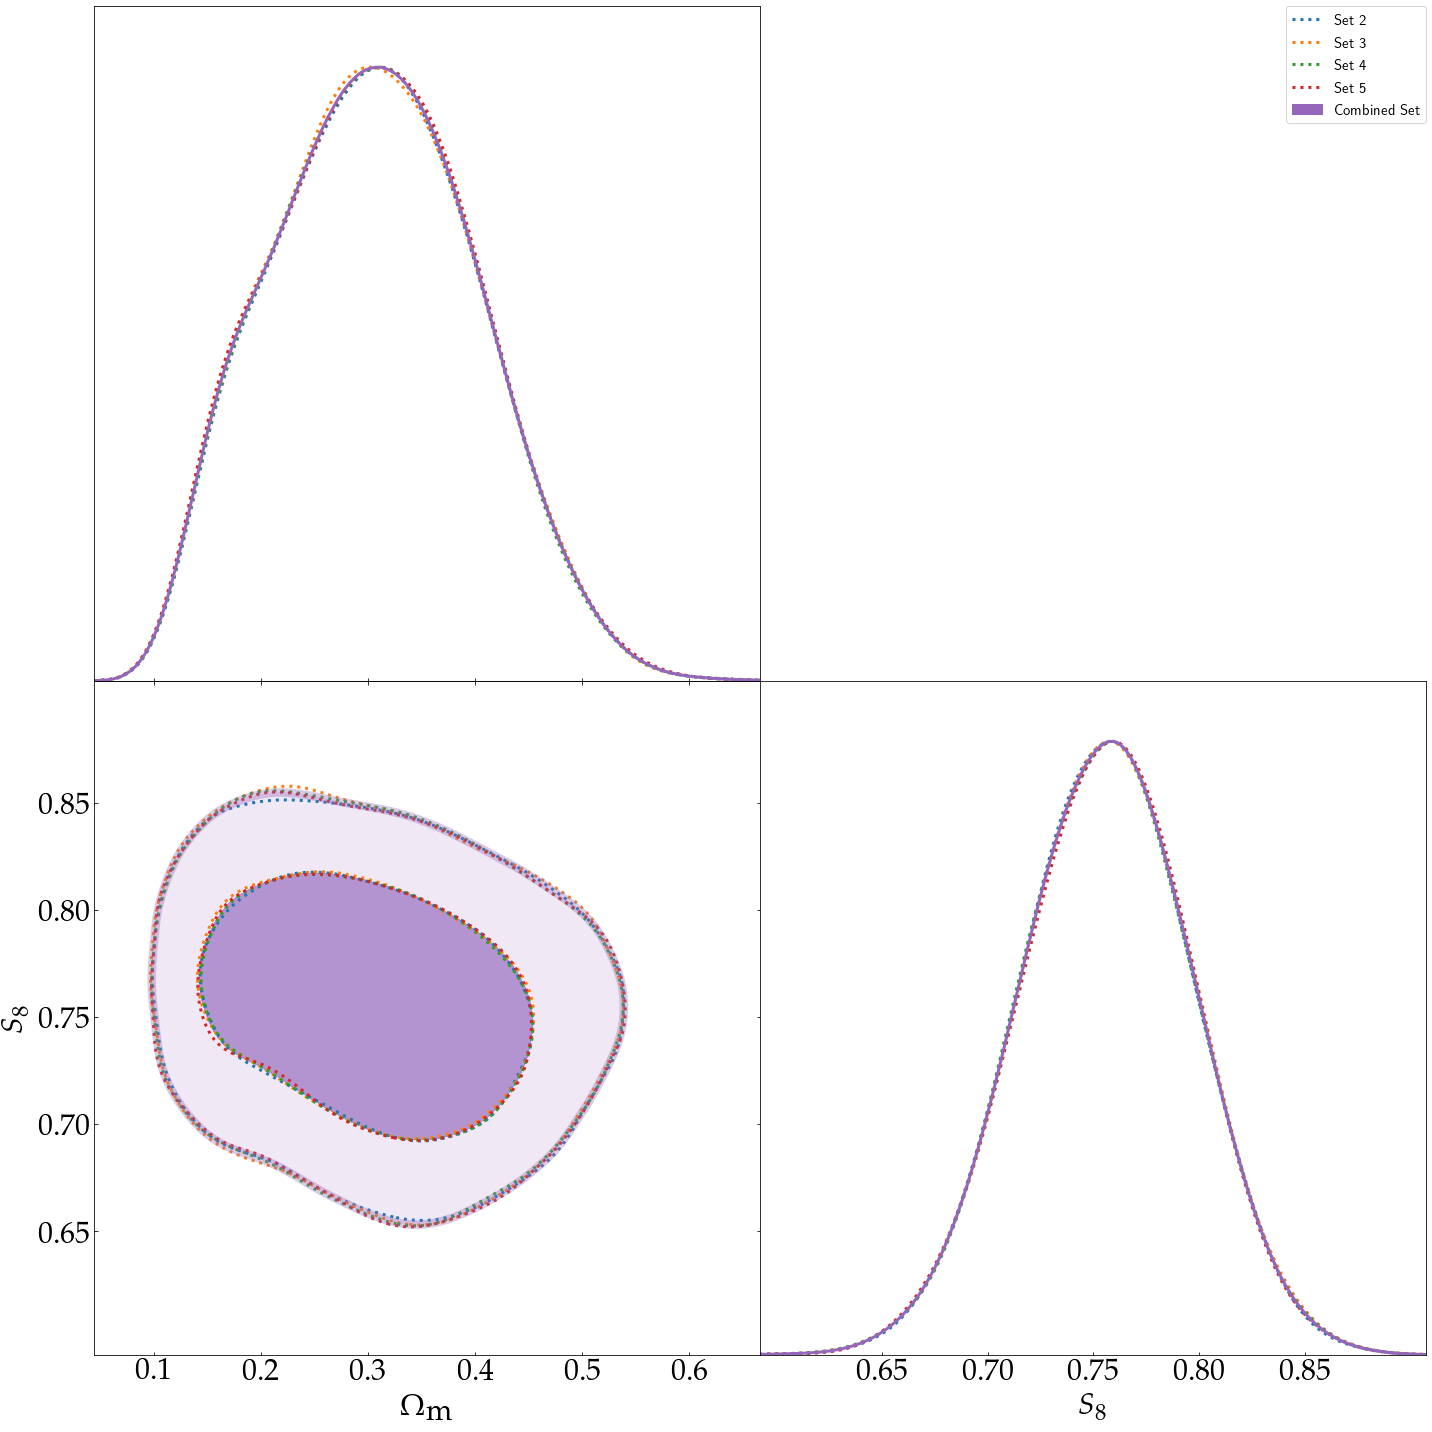

In [19]:
contours = np.array([0.68,0.95])

G = plots.getSubplotPlotter(subplot_size=10)
G.settings.solid_contour_palefactor = 0.8
G.settings.alpha_filled_add = alpha
G.settings.num_plot_contours = 2
G.settings.lw_contour = 3
G.settings.axes_fontsize = 30
G.settings.lab_fontsize = 30
G.settings.fontsize = 35 # important for padding in x-axis 
G.settings.legend_fontsize = 15
G.triangle_plot(random_triangle, filled = [False]*4+[True], contour_colors=random_colors, contour_lws=[3]*Nset, contour_ls=[':']*4+['-'])
# plt.savefig('/home/harry/Desktop/subsets.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()

### Planck Samples

In [20]:
# folder = '/home/harry/Desktop/Planck/base/plikHM_TTTEEE_lowl_lowE/'

# c1 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_1.txt')
# c2 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_2.txt')
# c3 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_3.txt')
# c4 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_4.txt')

# s1 = np.array([c1[:,31], c1[:,36]]).T
# s2 = np.array([c2[:,31], c2[:,36]]).T
# s3 = np.array([c3[:,31], c3[:,36]]).T
# s4 = np.array([c4[:,31], c4[:,36]]).T

# samples_planck = np.concatenate([s1, s2, s3, s4])

In [21]:
# planck_plot = MCSamples(samples=samples_planck,names = names, labels = labels, settings = settings)